In [467]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score, f1_score

%matplotlib inline

## Load the dataset

In [468]:
df = pd.read_csv("Exoplanets_2024.06.09_05.32.23.csv", delimiter=',', skiprows=35)

In [469]:
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,0,0,...,891.96,505.6,1.0,q1_q17_dr25_tce,5805.0,4.564,0.791,285.53461,48.285210,15.597
1,6721123,K00114.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,1,0,...,767.22,47.7,1.0,q1_q17_dr25_tce,6227.0,3.986,1.958,298.86435,42.151569,12.660
2,10419211,K00742.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,0,0,...,75.88,622.1,1.0,q1_q17_dr25_tce,5795.0,4.554,0.848,297.07993,47.597401,15.472
3,10464078,K00743.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,0,0,...,17.69,214.7,1.0,q1_q17_dr25_tce,5043.0,4.591,0.680,289.25821,47.635319,15.487
4,10480982,K00744.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,0,0,...,55.97,2317.0,1.0,q1_q17_dr25_tce,6117.0,4.496,0.947,295.81454,47.690350,15.341


In [470]:
df['koi_tce_plnt_num'].value_counts()

koi_tce_plnt_num
1.0    7745
2.0     972
3.0     326
4.0     111
5.0      41
6.0      14
7.0       8
8.0       1
Name: count, dtype: int64

In [471]:
df['koi_tce_delivname'].value_counts()

koi_tce_delivname
q1_q17_dr25_tce    8054
q1_q16_tce          796
q1_q17_dr24_tce     368
Name: count, dtype: int64

In [344]:
df.shape

(9564, 27)

In [345]:
#Column that will be treated as label for classification models.
df.koi_disposition.value_counts()

koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2743
CANDIDATE         1982
Name: count, dtype: int64

In [346]:
#objects with the known labels: confirmed as an exoplanet or false positive (not an exoplanet).
df_known_raw=df[df['koi_disposition']!='CANDIDATE']

In [347]:
#objects that are need to be defined
df_unknown_raw=df[df['koi_disposition'] =='CANDIDATE']

In [348]:
df_known_raw.koi_disposition.value_counts()

koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2743
Name: count, dtype: int64

In [349]:
df_known_raw.dtypes

kepid                  int64
kepoi_name            object
kepler_name           object
koi_disposition       object
koi_pdisposition      object
koi_score            float64
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_time0bk          float64
koi_impact           float64
koi_duration         float64
koi_depth            float64
koi_prad             float64
koi_teq              float64
koi_insol            float64
koi_model_snr        float64
koi_tce_plnt_num     float64
koi_tce_delivname     object
koi_steff            float64
koi_slogg            float64
koi_srad             float64
ra                   float64
dec                  float64
koi_kepmag           float64
dtype: object

In [350]:
#remove unnecessary columns: kepid, kepo
#flags=df_known.filter(regex=r'koi_fpflag').columns

In [351]:
df_known_raw['label']=df_known_raw['koi_disposition']

In [352]:
# not an exoplanet = 0, exoplanet = 1
df_known_raw['label'] = df_known_raw.label.replace('FALSE POSITIVE',0).replace('CONFIRMED',1).astype(int)

In [353]:
df_known=df_known_raw.iloc[:, 10:].copy()

In [354]:
df_unknown=df_unknown_raw.iloc[:, 10:].copy()

In [355]:
df_known.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,label
0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,1.0,q1_q17_dr25_tce,5805.0,4.564,0.791,285.53461,48.285210,15.597,0
1,7.361790,132.250530,1.169,5.02200,233.7,39.21,1342.0,767.22,47.7,1.0,q1_q17_dr25_tce,6227.0,3.986,1.958,298.86435,42.151569,12.660,0
2,11.521446,170.839688,2.483,3.63990,17984.0,150.51,753.0,75.88,622.1,1.0,q1_q17_dr25_tce,5795.0,4.554,0.848,297.07993,47.597401,15.472,0
3,19.403938,172.484253,0.804,12.21550,8918.7,7.18,523.0,17.69,214.7,1.0,q1_q17_dr25_tce,5043.0,4.591,0.680,289.25821,47.635319,15.487,0
4,19.221389,184.552164,1.065,4.79843,74284.0,49.29,698.0,55.97,2317.0,1.0,q1_q17_dr25_tce,6117.0,4.496,0.947,295.81454,47.690350,15.341,0


In [356]:
df_known.koi_tce_delivname.nunique()

3

## Feature engineering

In [357]:
df_known=pd.get_dummies(df_known, columns=['koi_tce_delivname'], dtype=int)

In [358]:
df_known.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,label,koi_tce_delivname_q1_q16_tce,koi_tce_delivname_q1_q17_dr24_tce,koi_tce_delivname_q1_q17_dr25_tce
0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,285.53461,48.285210,15.597,0,0,0,1
1,7.361790,132.250530,1.169,5.02200,233.7,39.21,1342.0,767.22,47.7,1.0,6227.0,3.986,1.958,298.86435,42.151569,12.660,0,0,0,1
2,11.521446,170.839688,2.483,3.63990,17984.0,150.51,753.0,75.88,622.1,1.0,5795.0,4.554,0.848,297.07993,47.597401,15.472,0,0,0,1
3,19.403938,172.484253,0.804,12.21550,8918.7,7.18,523.0,17.69,214.7,1.0,5043.0,4.591,0.680,289.25821,47.635319,15.487,0,0,0,1
4,19.221389,184.552164,1.065,4.79843,74284.0,49.29,698.0,55.97,2317.0,1.0,6117.0,4.496,0.947,295.81454,47.690350,15.341,0,0,0,1


In [359]:
df_known.describe()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,label,koi_tce_delivname_q1_q16_tce,koi_tce_delivname_q1_q17_dr24_tce,koi_tce_delivname_q1_q17_dr25_tce
count,7582.000000,7582.000000,7323.000000,7582.000000,7.323000e+03,7323.000000,7323.000000,7.363000e+03,7323.000000,7296.000000,7323.000000,7323.00000,7323.000000,7582.000000,7582.000000,7581.000000,7582.000000,7582.000000,7582.000000,7582.000000
mean,51.615992,162.392800,0.756121,5.709884,2.954100e+04,104.209436,1154.584460,9.396025e+03,318.710638,1.223684,5715.811553,4.31090,1.752660,292.135109,43.735649,14.251791,0.361778,0.052097,0.030203,0.879979
std,111.813351,62.875558,3.197033,6.823641,9.118703e+04,3181.134374,900.694085,1.782218e+05,881.257900,0.631908,819.355228,0.43727,6.280473,4.767184,3.573604,1.401371,0.480547,0.222237,0.171157,0.325008
min,0.241843,120.515914,0.000000,0.104600,8.000000e-01,0.080000,92.000000,2.000000e-02,0.000000,1.000000,2661.000000,0.04700,0.116000,279.852720,36.577381,6.966000,0.000000,0.000000,0.000000,0.000000
25%,2.243023,132.553008,0.227000,2.472125,1.825500e+02,1.500000,581.000000,2.723000e+01,15.400000,1.000000,5313.000000,4.21800,0.829000,288.818002,40.713316,13.427000,0.000000,0.000000,0.000000,1.000000
50%,8.062325,136.401784,0.586000,3.833200,5.014000e+02,2.620000,933.000000,1.814700e+02,30.500000,1.000000,5774.000000,4.43800,0.999000,292.325180,43.552040,14.500000,0.000000,0.000000,0.000000,1.000000
75%,30.481980,169.909212,0.917000,6.270775,2.319000e+03,24.195000,1482.000000,1.151575e+03,114.850000,1.000000,6116.500000,4.54300,1.346000,295.920650,46.650546,15.308000,1.000000,0.000000,0.000000,1.000000
max,1071.232624,1472.522306,100.806000,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,8.000000,15896.000000,5.28300,229.908000,301.720760,52.336010,20.003000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='label'>

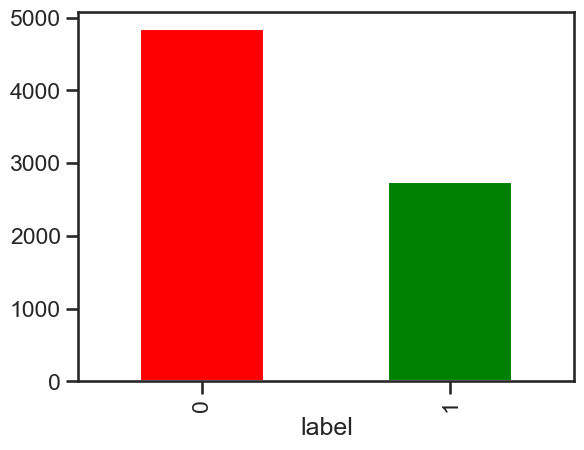

In [360]:
df_known.label.value_counts().plot.bar(color=['red', 'green'])

In [361]:
df_known.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7582 entries, 0 to 7581
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   koi_period                         7582 non-null   float64
 1   koi_time0bk                        7582 non-null   float64
 2   koi_impact                         7323 non-null   float64
 3   koi_duration                       7582 non-null   float64
 4   koi_depth                          7323 non-null   float64
 5   koi_prad                           7323 non-null   float64
 6   koi_teq                            7323 non-null   float64
 7   koi_insol                          7363 non-null   float64
 8   koi_model_snr                      7323 non-null   float64
 9   koi_tce_plnt_num                   7296 non-null   float64
 10  koi_steff                          7323 non-null   float64
 11  koi_slogg                          7323 non-null   float64
 1

In [362]:
df=df_known.dropna()

In [363]:
X_raw=df.drop(columns = ['label'])
y=df['label']

In [364]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_raw)

In [365]:
print(f"The range of feature inputs are within {X.min()} to {X.max()}")

The range of feature inputs are within 0.0 to 1.0


In [366]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000
mean,0.042166,0.029473,0.007441,0.039780,0.019683,0.000523,0.073690,0.000847,0.036039,0.032018,0.230201,0.814386,0.007140,0.563450,0.454818,0.560124,0.041339,0.027981,0.930681
std,0.098122,0.045038,0.030041,0.048881,0.059930,0.016088,0.061390,0.016392,0.098363,0.090134,0.061935,0.083732,0.027620,0.218063,0.227201,0.106363,0.199086,0.164930,0.254014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001759,0.008863,0.002282,0.017068,0.000119,0.000007,0.034511,0.000003,0.001756,0.000000,0.199773,0.796982,0.003098,0.412095,0.262363,0.496778,0.000000,0.000000,1.000000
50%,0.006640,0.011471,0.005902,0.026792,0.000330,0.000013,0.058662,0.000017,0.003501,0.000000,0.234756,0.838617,0.003843,0.573562,0.443577,0.578469,0.000000,0.000000,1.000000
75%,0.023576,0.034078,0.009117,0.043395,0.001654,0.000124,0.095918,0.000106,0.013256,0.000000,0.260521,0.858862,0.005348,0.737682,0.640244,0.639948,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train logistic regression models

In [367]:
#split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 42)

In [368]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (5689, 19), y_train: (5689,)


In [369]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (1423, 19), y_test: (1423,)


In [370]:
y.value_counts(normalize=True)

label
0    0.616001
1    0.383999
Name: proportion, dtype: float64

In [371]:
y_train.value_counts(normalize=True)

label
0    0.615925
1    0.384075
Name: proportion, dtype: float64

In [372]:
y_test.value_counts(normalize=True)

label
0    0.616304
1    0.383696
Name: proportion, dtype: float64

In [373]:
# L2 penalty to shrink coefficients without removing any features from the model
penalty= ['l2', 'l1', 'elasticnet']
# Our classification problem is multinomial
multi_class = 'auto'
# Use lbfgs for L2 penalty and multinomial classes
solver = ['lbfgs', 'saga', 'saga']
# Max iteration = 1000
max_iter = 1000
#elastic-net coef.
l1_ratio = 0.8

In [374]:
# Define a logistic regression model with above arguments
l2_model = LogisticRegression(random_state=42, penalty=penalty[0], multi_class=multi_class, solver=solver[0], max_iter=max_iter)

In [375]:
l2_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [376]:
l2_preds = l2_model.predict(X_test)

In [377]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [378]:
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.8046380885453268,
 'recall': array([0.8722919, 0.6959707]),
 'precision': array([0.8216971 , 0.77235772]),
 'f1score': array([0.84623894, 0.73217726])}

In [379]:
l1_model = LogisticRegression(random_state=42, penalty=penalty[1], multi_class=multi_class, solver=solver[1], max_iter=max_iter)

In [380]:
l1_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', random_state=42, solver='saga')

In [381]:
l1_preds = l1_model.predict(X_test)

In [382]:
evaluate_metrics(y_test, l1_preds)

{'accuracy': 0.859451862262825,
 'recall': array([0.8677309 , 0.84615385]),
 'precision': array([0.90059172, 0.79930796]),
 'f1score': array([0.88385598, 0.82206406])}

In [383]:
en_model = LogisticRegression(random_state=42, penalty=penalty[2], multi_class=multi_class, solver=solver[2], max_iter = 1000, l1_ratio=l1_ratio)
en_model.fit(X_train, y_train)
en_preds = en_model.predict(X_test)

In [384]:
evaluate_metrics(y_test, en_preds)

{'accuracy': 0.8383696416022488,
 'recall': array([0.8631699, 0.7985348]),
 'precision': array([0.87312572, 0.78417266]),
 'f1score': array([0.86811927, 0.79128857])}

In [385]:
cf1 = confusion_matrix(y_test, l1_preds, normalize='true')

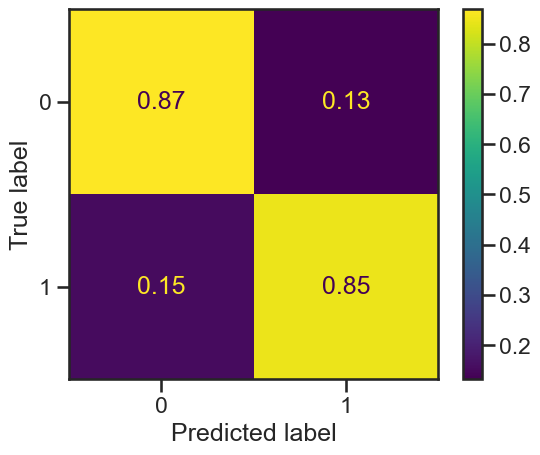

In [386]:
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf1,display_labels=l1_model.classes_)
disp.plot()
plt.show()

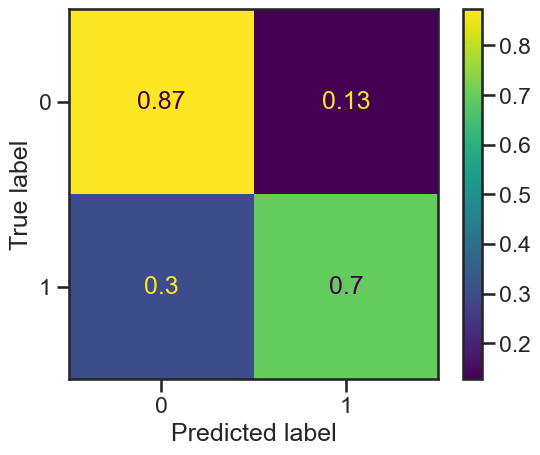

In [387]:
cf2 = confusion_matrix(y_test, l2_preds, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf2,display_labels=l2_model.classes_)
disp.plot()
plt.show()

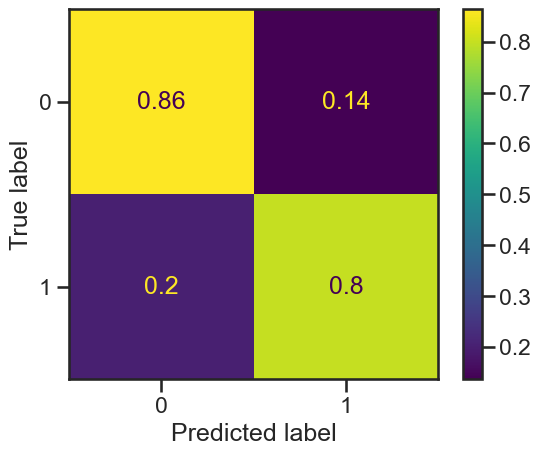

In [388]:
cf_en = confusion_matrix(y_test, en_preds, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf_en,display_labels=en_model.classes_)
disp.plot()
plt.show()

In [422]:
df_unknown=df_unknown.dropna()

In [390]:
df_unknown=pd.get_dummies(df_unknown, columns=['koi_tce_delivname'], dtype=int)

In [391]:
df1.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,koi_tce_delivname_q1_q16_tce,koi_tce_delivname_q1_q17_dr24_tce,koi_tce_delivname_q1_q17_dr25_tce
7582,19.899140,175.850252,0.969,1.7822,10829.0,14.60,638.0,39.30,76.3,1.0,5853.0,4.544,0.868,297.00482,48.134129,15.436,0,0,1
7583,40.419504,173.564690,0.911,3.3620,6256.0,7.51,467.0,11.29,36.9,1.0,5446.0,4.507,0.781,294.31686,50.080231,15.487,0,0,1
7584,7.240661,137.755450,1.198,0.5580,556.4,19.45,734.0,68.63,13.7,2.0,5005.0,4.595,0.765,293.83331,50.230350,15.334,0,0,1
7585,3.435916,132.662400,0.624,3.1330,23.2,0.55,1272.0,617.61,8.7,3.0,5779.0,4.339,1.087,287.88733,46.276241,12.791,0,0,1
7586,10.181584,177.141891,0.920,3.5089,5741.1,7.73,812.0,102.91,183.6,1.0,5988.0,4.541,0.836,291.28195,38.241669,15.657,0,0,1


In [392]:
#check that columns in known and unknown datasets are the same
col_un=df1.columns

In [393]:
col=df.drop(columns = ['label']).columns

In [394]:
col_un==col

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [395]:
df1=df_unknown.dropna()

In [396]:
X_unknown = scaler.fit_transform(df1)

In [397]:
pd.DataFrame(X_unknown).describe().T

,count,mean,std,min,25%,50%,75%,max
0,1833.0,0.117563,0.183185,0.0,0.006977,0.022253,0.136625,1.0
1,1833.0,0.071430,0.104846,0.0,0.013346,0.022653,0.069876,1.0
2,1833.0,0.007635,0.045619,0.0,0.001600,0.004194,0.008251,1.0
3,1833.0,0.117557,0.108268,0.0,0.049099,0.080455,0.140638,1.0
4,1833.0,0.003913,0.026683,0.0,0.000326,0.000690,0.001576,1.0
5,1833.0,0.000915,0.024467,0.0,0.000009,0.000014,0.000026,1.0
6,1833.0,0.117269,0.094267,0.0,0.051526,0.096753,0.154741,1.0
7,1833.0,0.003538,0.035218,0.0,0.000019,0.000147,0.000784,1.0
8,1833.0,0.021146,0.064494,0.0,0.006172,0.007629,0.010472,1.0
9,1833.0,0.050191,0.123614,0.0,0.000000,0.000000,0.000000,1.0


In [398]:
y_unknown_l1=l1_model.predict(X_unknown)

In [399]:
pd.DataFrame(y_unknown_l1).value_counts()

0    1794
1      39
Name: count, dtype: int64

In [400]:
y_unknown_l1.shape

(1833,)

## Interpret logistic regression models

In [442]:
columns=df.drop(columns = ['label']).columns.to_numpy()

In [447]:
columns

array(['koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration',
       'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr',
       'koi_tce_plnt_num', 'koi_steff', 'koi_slogg', 'koi_srad', 'ra',
       'dec', 'koi_kepmag', 'koi_tce_delivname_q1_q16_tce',
       'koi_tce_delivname_q1_q17_dr24_tce',
       'koi_tce_delivname_q1_q17_dr25_tce'], dtype=object)

In [443]:
l1_model.coef_

array([[-10.77411351,   0.        , -88.16182304, -15.88269433,
        -73.63510257,   0.        , -40.02361996,   0.        ,
          0.        ,   4.95542572,   0.88962905,  -2.56999975,
          0.        ,  -1.53437791,   0.97938526,  -2.24812098,
         -1.46777573,   0.        ,   3.92881447]])

In [472]:
print(list(zip(l1_model.coef_[0, :], columns)))

[(-10.77411350562987, 'koi_period'), (0.0, 'koi_time0bk'), (-88.16182303789579, 'koi_impact'), (-15.882694330212002, 'koi_duration'), (-73.63510257042564, 'koi_depth'), (0.0, 'koi_prad'), (-40.023619963255825, 'koi_teq'), (0.0, 'koi_insol'), (0.0, 'koi_model_snr'), (4.955425717936619, 'koi_tce_plnt_num'), (0.8896290470096685, 'koi_steff'), (-2.569999745229492, 'koi_slogg'), (0.0, 'koi_srad'), (-1.5343779145448018, 'ra'), (0.9793852625333497, 'dec'), (-2.2481209841932244, 'koi_kepmag'), (-1.4677757283702646, 'koi_tce_delivname_q1_q16_tce'), (0.0, 'koi_tce_delivname_q1_q17_dr24_tce'), (3.928814465602193, 'koi_tce_delivname_q1_q17_dr25_tce')]


In [460]:
# Extract and sort feature coefficients
def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

In [461]:
coef_dict = get_feature_coefs(l1_model, 0, columns)

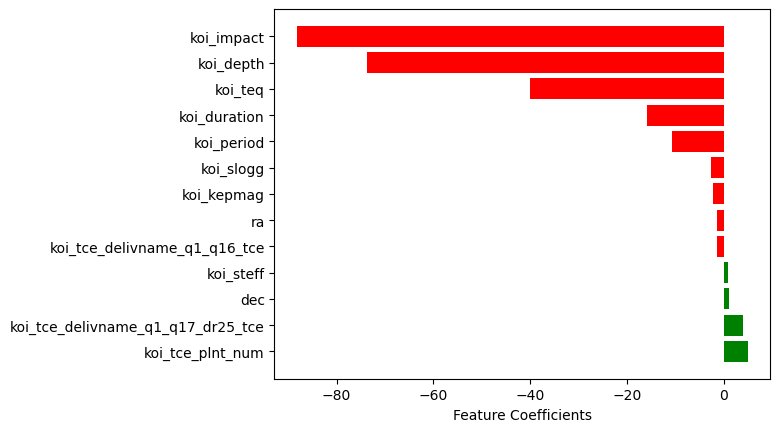

In [462]:
visualize_coefs(coef_dict)

## KNN

In [401]:
from sklearn.neighbors import KNeighborsClassifier

In [402]:
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1920x1440 with 0 Axes>

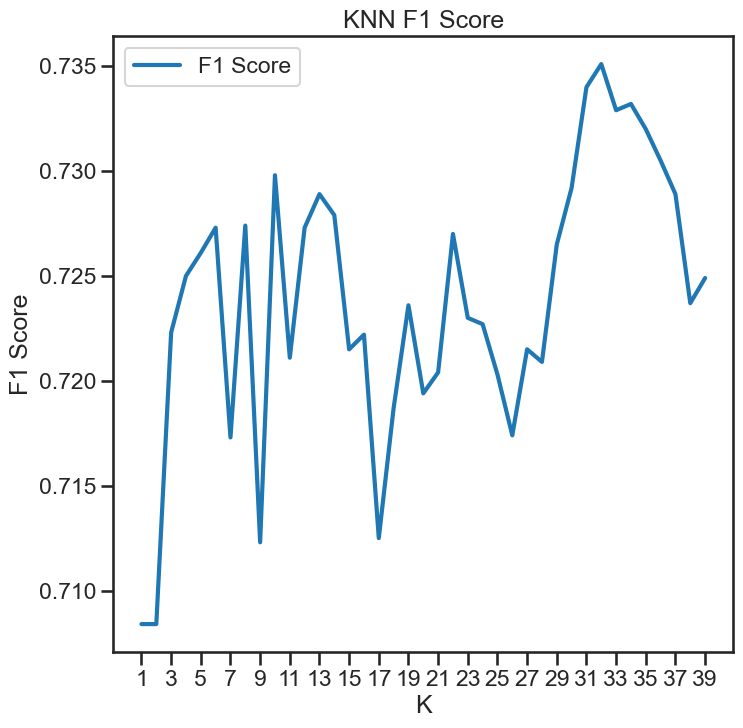

In [403]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(8, 8), linewidth=3)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1920x1440 with 0 Axes>

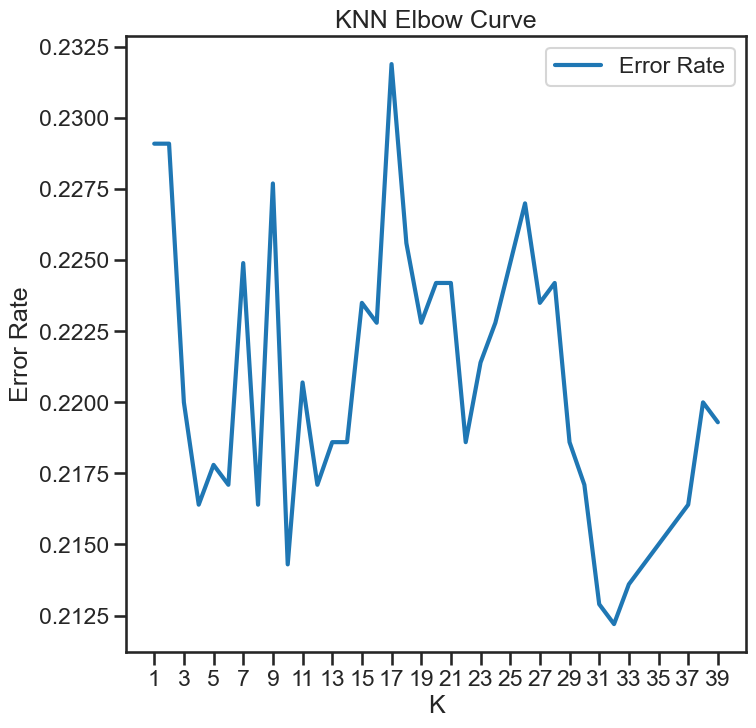

In [404]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(8, 8), linewidth=3)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')
### END SOLUTION

In [405]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=32)
knn = knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test) #without values throws error message for new scikit.learn versions


In [406]:
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, knn_preds))
print('Accuracy score: ', round(accuracy_score(y_test, knn_preds), 2))
print('F1 Score: ', round(f1_score(y_test, knn_preds), 2))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       877
           1       0.70      0.74      0.72       546

    accuracy                           0.78      1423
   macro avg       0.77      0.77      0.77      1423
weighted avg       0.78      0.78      0.78      1423

Accuracy score:  0.78
F1 Score:  0.72


Text(57.08333333333333, 0.5, 'Ground Truth')

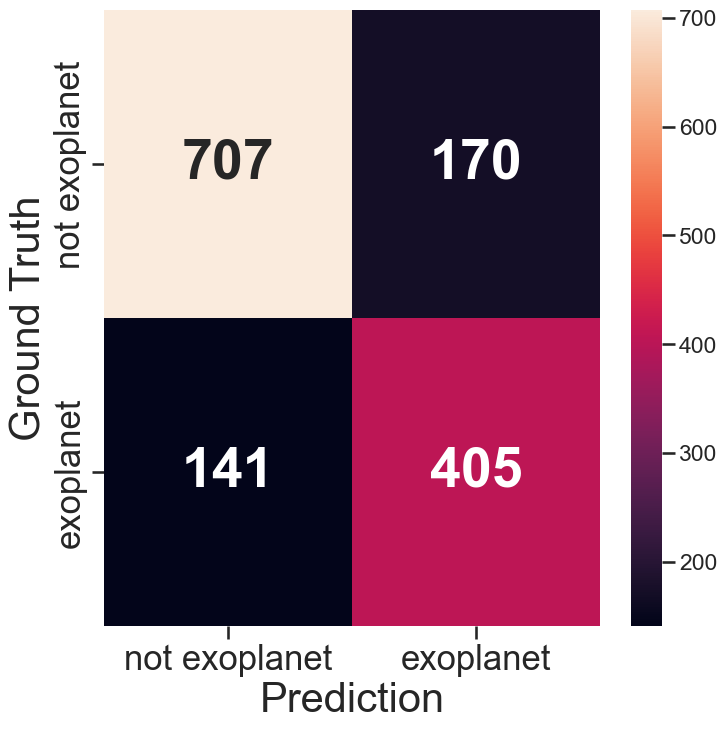

In [407]:
confusion_matrix(y_test, y_pred)
# Plot confusion matrix
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(confusion_matrix(y_test, knn_preds), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['not exoplanet', 'exoplanet']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_xlabel('Prediction', fontsize=30);
ax.set_ylabel('Ground Truth', fontsize=30)
### END SOLUTION

In [408]:
y_unknown_knn = knn.predict(X_unknown)

In [409]:
pd.DataFrame(y_unknown_knn).value_counts()

0    1528
1     305
Name: count, dtype: int64

## Decision Tree

In [410]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [411]:
#no pruning tree
dt.tree_.node_count, dt.tree_.max_depth

(807, 25)

In [412]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)


In [413]:

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.888264
precision,1.0,0.867173
recall,1.0,0.836996
f1,1.0,0.851817


Overfitted tree since all the parameters are 1 in training.

In [414]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [415]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(423, 11)

In [416]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [417]:
train_test_gr_error

,train,test
accuracy,0.956056,0.888967
precision,0.926399,0.840351
recall,0.962014,0.877289
f1,0.943871,0.858423


In [418]:
y_unknown_dt=GR.predict(X_unknown)

In [419]:
pd.DataFrame(y_unknown_dt).value_counts()

0    1158
1     675
Name: count, dtype: int64

In [423]:
df_unknown.shape

(1833, 19)

In [426]:
df_unknown['logreg_l1']=y_unknown_l1
df_unknown['knn']=y_unknown_knn
df_unknown['dt']=y_unknown_dt

In [427]:
df_unknown.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,...,koi_srad,ra,dec,koi_kepmag,koi_tce_delivname_q1_q16_tce,koi_tce_delivname_q1_q17_dr24_tce,koi_tce_delivname_q1_q17_dr25_tce,logreg_l1,knn,dt
7582,19.899140,175.850252,0.969,1.7822,10829.0,14.60,638.0,39.30,76.3,1.0,...,0.868,297.00482,48.134129,15.436,0,0,1,0,0,0
7583,40.419504,173.564690,0.911,3.3620,6256.0,7.51,467.0,11.29,36.9,1.0,...,0.781,294.31686,50.080231,15.487,0,0,1,0,1,0
7584,7.240661,137.755450,1.198,0.5580,556.4,19.45,734.0,68.63,13.7,2.0,...,0.765,293.83331,50.230350,15.334,0,0,1,0,1,0
7585,3.435916,132.662400,0.624,3.1330,23.2,0.55,1272.0,617.61,8.7,3.0,...,1.087,287.88733,46.276241,12.791,0,0,1,0,1,0
7586,10.181584,177.141891,0.920,3.5089,5741.1,7.73,812.0,102.91,183.6,1.0,...,0.836,291.28195,38.241669,15.657,0,0,1,0,0,1
